# Debugging stuffs

In [ ]:
!wget https://www.dropbox.com/s/28ognwtvvw2w55y/decaptcha%20dataset.zip # gets the file from dropbox
!unzip "/content/decaptcha dataset.zip" # unzips the file

In [ ]:
import warnings
import itertools
warnings.filterwarnings('ignore')
import os
def getfiles(d):
  return os.listdir(d)

# **DeCaptcha**
This is Jeremy and Matthew's project for the ECE major at the WPI Pre-College Summer Camp.


The goal is for this model is to be able to read text from a "Completely Automated Public Turing test to tell Computers and Humans Apart (CAPTCHA)." The dataset I will be using can be found here: https://www.kaggle.com/datasets/parsasam/captcha-dataset


I will be using the **CNN model** for learning, using https://www.kaggle.com/code/yassineghouzam/introduction-to-cnn-keras-0-997-top-6 and https://medium.com/@manvi./captcha-recognition-using-convolutional-neural-network-d191ef91330e as guides. I will also be writing my thought process, what I learned, and my results here.

**Contents:**
 1. Import Necessary Libraries
 2. Data Preprocessing
 3. Creating Model
 4.

**We will be following this pipeline**

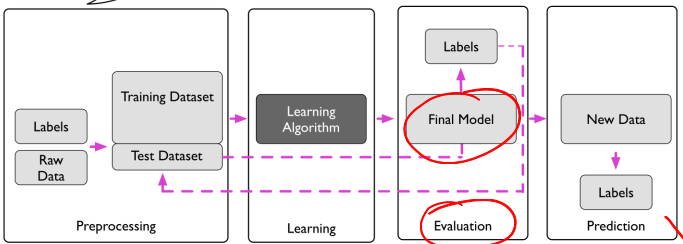

# Libraries:
* Reading/Manipulating Data: Pandas, Numpy, Itertools, CSV, PIL
* Displaying Data: Matplotlib, Seaborn
* Machine Learning: Sklearn, Keras

# 1) **Data Preprocessing**
Our data currently is consisted of 113,000 images, and we will be converting this in to a csv for ease of use.

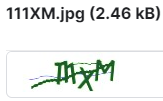

Each image is **150x40** pixels. The images consist of texts with many different colors, with the text being listed in the title.

We are planning to quantize each image's pixel in a format similar to this:

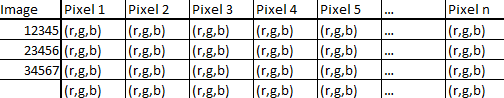*(the nth pixel in this case would be the 6,000th pixel)*

This would allow ease of reading and be much easier for the computer to read compared to the images themselves

Methods that we will be using:
* csv.writer(csvfile, dialect='excel', \*\*fmtparams) **This will allow us to create a csv writer object and start writing**
* csvwriter.writerow(row) **This will write the input list (row) onto one of the csv file's rows**
* Example usage of csv lib here: https://www.geeksforgeeks.org/writing-csv-files-in-python/
* https://stackoverflow.com/questions/11064786/get-pixels-rgb-using-pil **This article shows how we can use the Python Imaging Library to read the rgb values of pixels in an image**

In [ ]:
size = (40,150,3) # our image is 40 by 150 pixels and also has 3 channels (r,g,b)
# from PIL import Image
# def imgConvert(imageName):


# img = Image.open("imageName") #Placeholder
# rgb_img = img.convert('RGB')
# for i <= 149,i=0,i++
#     for n <= 39, n = 0, n++
#         r,g,b = rgb_img.getpixel((i,n)
#         print(r,g,b)
trein = "/content/decaptcha/Train"
test = "/content/decaptcha/Validation"

We messed up cuz the model needs to be able to read the letters INDIVIDUALLY instead of reading the entire captcha at once.

Im going to try to use OpenCV's **imread** method instead of pillow's because it is faster

I have split the images manually using microsoft file explorer at around 36% of data being in the validation folder.

We use the OS library's **listdir** method to find the length of the list of images in a folder.

In [ ]:
trainlen = len(os.listdir(trein)) # to check if the folder actually has the images and get the length
testlen = len(os.listdir(test))

print(f"# of Images in Training Dataset: {trainlen}\n# of Images in Validation Dataset: {testlen}")

From this quick test, we can see that the train dataset is comprised of **70,927** images and the testing dataset is comprised of **42,136** images.

The possible characters in a captcha are: 26 lowercase + 26 uppercase + 10 digits = **62**

In [ ]:
import string
import matplotlib.pyplot as plt
%matplotlib inline
characters = string.ascii_lowercase + string.ascii_uppercase + '0123456789' # this is to be able to identify the specific characterin the captcha
lencharacters = len(characters) # to be able to iterate without having to use the len function every time


Because all of the captchas are 5 digits long, we will need an array (5 by 62) which the machine stores all the data for each character in to identify the digits

In [ ]:
import numpy as np
import cv2 as cv
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras import callbacks
from keras.optimizers import RMSprop
# def pp(directory): # Input is the directory of images you want to convery into x and y

#     num_images = len(os.listdir(directory))

#     X = np.zeros((num_images, 40, 150, 3)) # creates an array with "num_images" * 40 * 150 to store the pixel values of each image
#     y = np.zeros((5, num_images, lencharacters)) # gets an array to be able to assign the images a label out of 62 possible characters

#     for i, pic in enumerate(os.listdir(directory)): # gives each image with a number
#         img = cv.imread(os.path.join(directory, pic)) # reads the data of the image
#         name = pic[:-4] # Takes the name without the .jpg

#         if len(name) < 6: # makes sure machine is not tripping
#             img = img / 255.0 # changes the rgb values so thata it is in between 0 and 1
#             img = np.reshape(img, (40, 150, 3)) # changes image into a large array to be able to grab values from

#             target = np.zeros((5, lencharacters)) # creates an array 5 by 62 with all entries 0 to be able to dump data in later

#             for j, k in enumerate(name): # labels each letter
#                 index = characters.find(k) # gets the index of the letter we want in the list of possible letters
#                 target[j, index] = 1 # puts a 1 in the spot k was in allowing us to track both the order and the number of the 5 letters in the captcha

#             X[i] = img # stores the image for later
#             y[:,i] = target # stores all the data for the labels in that image

#     return X, y


# 2) Creating Model

**What is a Convolutional Neural Network?**

A CNN is a type of Neural Network most commonly used to analyze visual data.

CNN models are more stable versions of multilayer perceptrons. Instead of analyzing an image all at once, they break it down into simpler features called "**filters**."

The filters are then applied to different areas of the input to see if they match/are close. As you go deeper in the network, the features get more and more complicated, allowing the model to identify pretty abstract versions of the input.

**The Convolution Layer**

The objective of the Convolution Operation is to extract the high-level features such as edges, from the input.

Convolution layers are layers of equations (With one filter per convolution layer). The more convolution layers created the more complex the equations become with the tradeoff of having better quality.

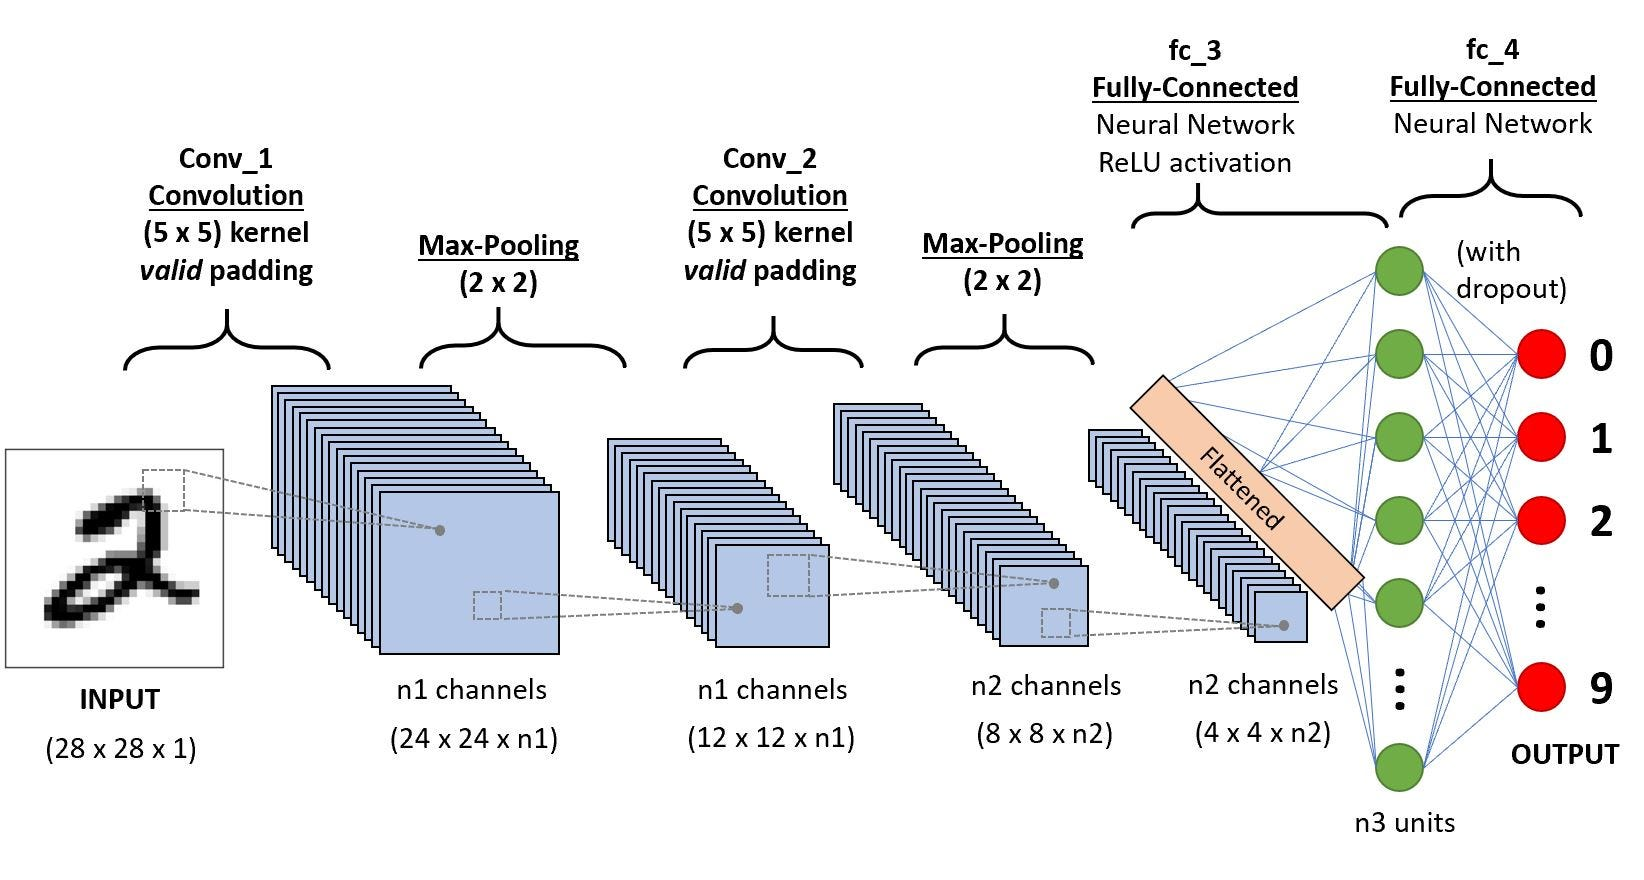

**The Pooling Layer**

Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature. This is important to decrease the time it takes to compute images (simplification).

Furthermore, the Pooling Layer is used a Noise Supressant. This means that it helps decrease the amount of errors you get. Having a Noise Supressant is important because the Convolution Layer increases Noise.

**Normalization Layer**

Normalizing is when you make 'normal,' in other words, Normalizing is when make unknown data conform with all the other data so they all have a happy home where they're all exactly the same. This is pretty much the sole job of the Normalization Layer.

**Flatten Layer**

Flatten layers are used to multidimensional variable inputs (In our case, 4) into a single dimensional input, simplifying the equations. It's used to link a Convolution Layer into a vector.

**Dropout Layer**

A Dropout Layer, similar to the name, drops out a digits to 0 at a predetermined frequency. This is used to reduce overfitting, which is when there is high variance and you get very unstable or incorrect results.

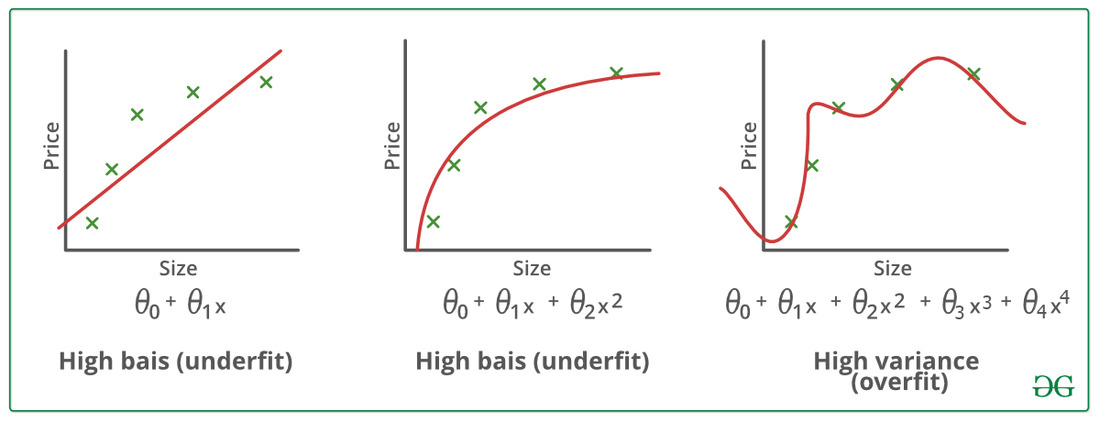

**Dense Layer**

A Dense Layer is a layer that is a simple layer of neurons in which each neuron receives input from all the neurons of previous layer. They are used because in a computationally intense task, math is used. This layer specializes in calculations.

**RelU activation**

ReLU stands for: rectified linear unit. ReLU activation is an activation function that introduces the property of nonlinearity to a deep learning model and solves the vanishing gradients issue. It is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

**Sigmoid activation**

Another Activation function

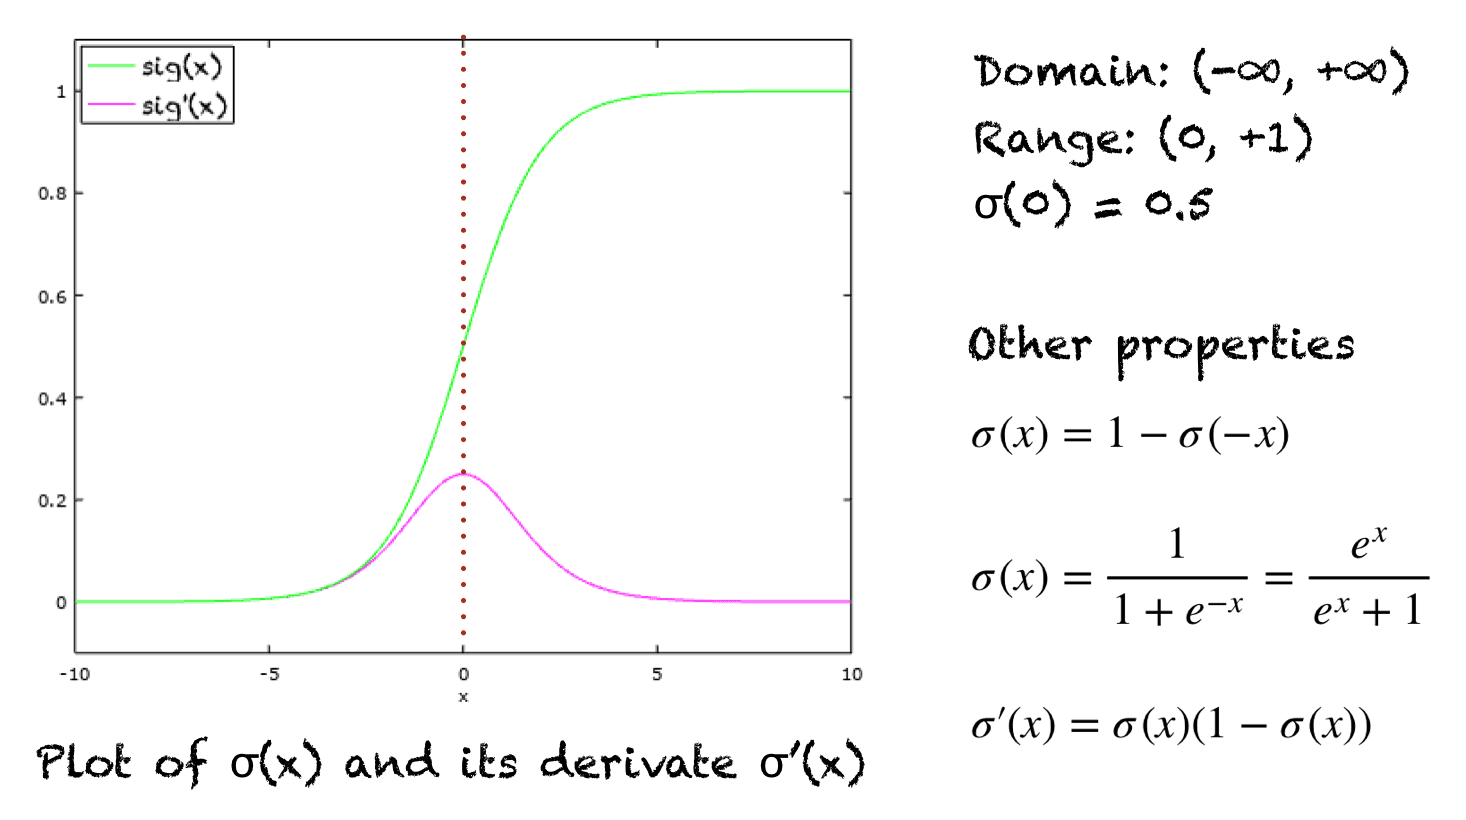

takes any real value as input and outputs values in the range of 0 to 1. The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to 0.0

We will be using filter/kernel size **3x3**.

Skip these cells if using newest model:

In [ ]:
# optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.001)

# def cmodel():
#     img = layers.Input(shape = size)# initialize keras tensor and set the size of the input
#     conv1 = layers.Conv2D(32,(5,5), padding = 'same', activation = 'relu')(img) # 1st convolution layer making sure the tensor size stays the same
#     mp1 = layers.MaxPooling2D(pool_size = (2,2),padding='same')(conv1) # 1st pooling layer
#     conv2 = layers.Conv2D(64,(5,5), padding = 'same', activation = 'relu')(mp1) # 2nd convolution layer
#     mp2 = layers.MaxPooling2D(pool_size = (2,2),padding='same')(conv2) # 2nd pooling layer
#     dp = layers.Dropout(0.25)(mp2)
#     conv3 = layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu')(dp) # 3rd convolution layer
#     mp3= layers.MaxPooling2D(pool_size = (2,2),padding='same')(conv3)
#     flat = layers.Flatten()(mp3) # flattens the layers into a vector or smth

#     outs = []
#     for _ in range(5): # for each layer of the captcha
#         dens1 = layers.Dense(256, activation='relu')(flat) # normal Neural Network layer
#         drop = layers.Dropout(0.5)(dens1) # drops half of the nodes
#         res = layers.Dense(lencharacters, activation = 'sigmoid')(drop) # Results

#         outs.append(res) # adds the result of the layers to the end of the out list

#     model = Model(img, outs) # creates the model
#     model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
#     return model

In [ ]:
# X_train, y_train = pp(trein)
# X_test, y_test = pp(test)

In [ ]:
# #initializes model
# model = cmodel();
# model.summary();

In [ ]:
# #Apply model
# hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=128, epochs=20, validation_split=0.2)

In [ ]:
# model.save('model5.h5')

In [ ]:
# #graph of loss vs epochs
# for label in ["loss"]:
#   plt.plot(hist.history[label],label=label)
# plt.legend()
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.savefig('LossVsEpochs.png')
# plt.show()

This is the code to get model v1

In [ ]:
# import keras
# !wget https://www.dropbox.com/s/4s3a6r22qe6xu9n/model1.h5 # Gets the final Model
# model = keras.models.load_model('model1.h5') #OMGOMGOMGOGMOGMOMGOMGOMGOMG

This is the code to get model v2

In [ ]:
# import keras
# !wget https://www.dropbox.com/s/6bc87myjorn2s5p/model2.h5 # Gets the final Model
# model = keras.models.load_model('model2.h5') #OMGOMGOMGOGMOGMOMGOMGOMGOMG

This is the code to get model v3

In [ ]:
# import keras
# !wget https://www.dropbox.com/s/grtgvlm5kdhy7w5/model3.h5 # Gets the final Model
# model = keras.models.load_model('model3.h5') #OMGOMGOMGOGMOGMOMGOMGOMGOMG

Model v4

In [ ]:
import keras
!wget https://www.dropbox.com/s/nn6yf03v9k6iw34/model4.h5
model = keras.models.load_model('model4.h5')

We then need to evaluate the models we make:

In [ ]:
# preds = model.evaluate(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]])
# print ("Loss on training set= " + str(preds[0]))

In [ ]:
# #Finding loss on test set
# preds = model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]])
# print ("Loss on testing set= " + str(preds[0]))

Make a Confusion Matrix !!!!!!!!!!!!!!

Using Model No. 4 we have achieved around a **6% loss**, which I think is pretty decent.

We make predictions!!!!!!!!!!!!!!!!!!!

In [ ]:
#to predict captcha
def predict(directory):
    img = cv.imread(directory)
    if img is not None: #image found at file path
        img = img / 255.0 #Scale image
    else:
        print("Not detected");
    plt.imshow(img)
    X = np.zeros((1, 40, 150, 3)) # makes image 4d array
    X[0] = img # puts image in array
    res = np.array(model.predict(X)) #np.newaxis=1
    #1*40*150*3
    print(res)
    result = np.reshape(res, (5, 62)) #reshape the array
    print(result)
    k_ind = []
    probs = []
    for i in result:
        k_ind.append(np.argmax(i)) #adds the index of the char found in captcha

    capt = '' #string to store predicted captcha
    for k in k_ind:
        capt += characters[k] #finds the char corresponding to the index
    return capt

You can see the files we can use to test the model if you run the cell below

In [ ]:
getfiles(test)

In [ ]:
print("Predicted Captcha =" + predict('/content/decaptcha/Validation/YArme.jpg'))